In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [2]:
image_size=256
batch_size=32
channels=3
EPOCHS=5

In [3]:
#API

dataset=tf.keras.preprocessing.image_dataset_from_directory(
"village plant",
shuffle=True,
image_size=(image_size,image_size),
batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
len(dataset) #68*32

68

In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) #every label here is tensor 

(32, 256, 256, 3)
[0 1 1 0 1 1 2 0 0 0 0 0 1 0 0 0 0 2 0 0 2 0 0 1 0 0 1 0 1 0 1 1]


In [7]:
#printing first image 
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

[[[ 96.  85.  89.]
  [ 96.  85.  89.]
  [126. 115. 119.]
  ...
  [130. 124. 128.]
  [127. 121. 125.]
  [125. 119. 123.]]

 [[116. 105. 109.]
  [101.  90.  94.]
  [111. 100. 104.]
  ...
  [132. 126. 130.]
  [129. 123. 127.]
  [127. 121. 125.]]

 [[119. 108. 112.]
  [107.  96. 100.]
  [107.  96. 100.]
  ...
  [130. 124. 128.]
  [129. 123. 127.]
  [128. 122. 126.]]

 ...

 [[143. 141. 146.]
  [116. 114. 119.]
  [139. 137. 142.]
  ...
  [164. 159. 166.]
  [164. 159. 166.]
  [165. 160. 167.]]

 [[147. 145. 150.]
  [155. 153. 158.]
  [174. 172. 177.]
  ...
  [165. 160. 167.]
  [165. 160. 167.]
  [164. 159. 166.]]

 [[156. 154. 159.]
  [158. 156. 161.]
  [161. 159. 164.]
  ...
  [165. 160. 167.]
  [165. 160. 167.]
  [164. 159. 166.]]]
(256, 256, 3)


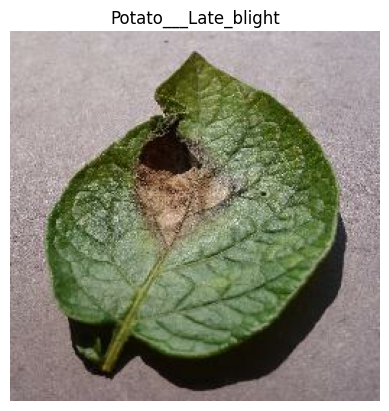

In [8]:
#with name 
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    
    plt.title(class_names[label_batch[0]])

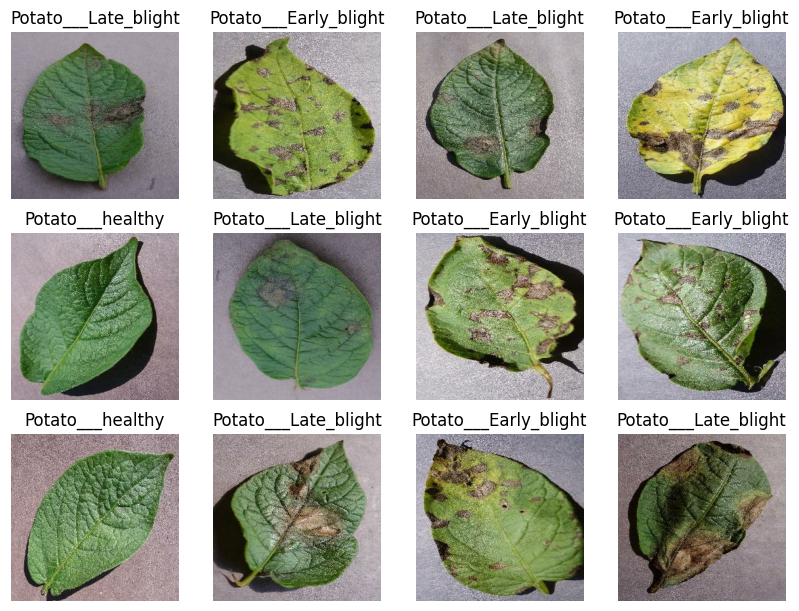

In [9]:
#for more images
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    
        plt.title(class_names[label_batch[i]])

In [10]:
len(dataset)

68

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)
len(train_ds)

54

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=dataset.take(6)
len(val_ds)

6

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
#function for all this 
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds,val_ds,test_val=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)


54

In [20]:
len(val_ds)

6

In [21]:
#important concepts 
#next iteration if you need an image it will directly work
#prefetch :- related to GPU and CPU loding 
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
#Datasets are optimized now 
#Preprocessing :- 
# 1 .SCALE 
#2. Resizing
resizing_and_reascaling=tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size,image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [23]:
#DATA AUGMENTATION 
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [24]:
input_shape=(batch_size,image_size,image_size,channels)
model=models.Sequential([
    resizing_and_reascaling,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=image_size),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model.build(input_shape=input_shape)

C:\Users\Meshack\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#define achitecture and then compile 
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [27]:
history=model.fit(
train_ds,
epochs=5,
batch_size=batch_size,
verbose=1,
validation_data=val_ds
)

Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4820 - loss: 0.9375 - val_accuracy: 0.7448 - val_loss: 0.8359
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6454 - loss: 0.7860 - val_accuracy: 0.6875 - val_loss: 0.7070
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.7778 - loss: 0.5027 - val_accuracy: 0.8229 - val_loss: 0.4000
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8274 - loss: 0.4167 - val_accuracy: 0.8281 - val_loss: 0.4022
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8827 - loss: 0.2769 - val_accuracy: 0.9167 - val_loss: 0.1945


In [27]:
score=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.4939 - loss: 1.0976


In [28]:
score


[1.0975350141525269, 0.48275861144065857]

In [ ]:
history.history["accuracy"]

In [41]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

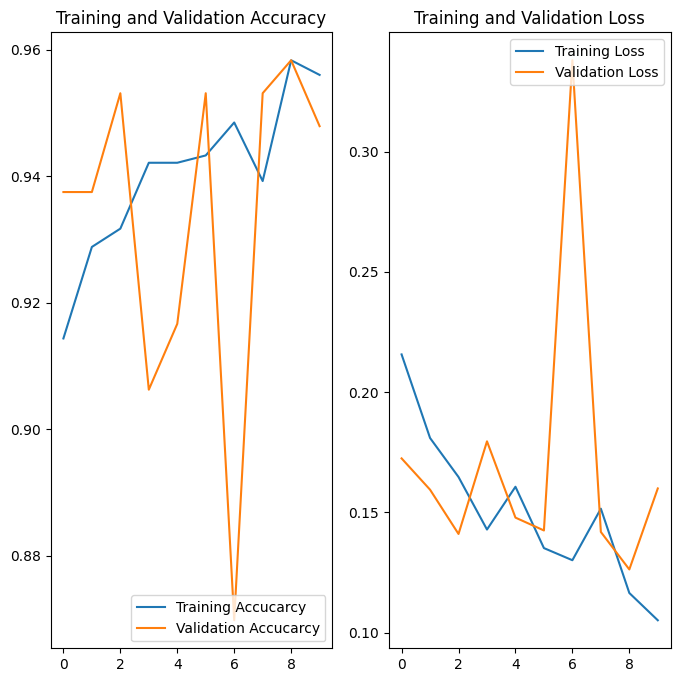

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accucarcy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accucarcy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

first image to predict 
actual Label: 1 Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
[2.7259201e-02 9.7273761e-01 3.2478924e-06]
predicted Label: Potato___Late_blight


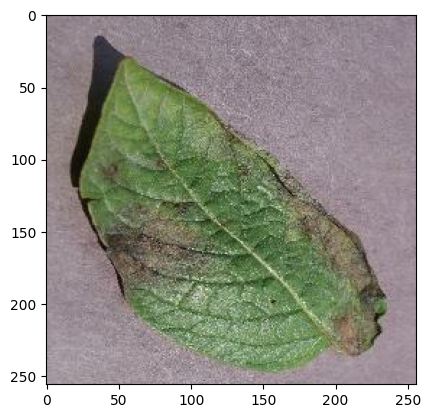

In [61]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    first_label=label_batch[0].numpy()
    
    print("first image to predict ")
    plt.imshow(first_image)
    print("actual Label:",first_label,class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    print(batch_prediction[0])
    print("predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [93]:
def predict(model,img):
    img_array=tf.keras.utils.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)# create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


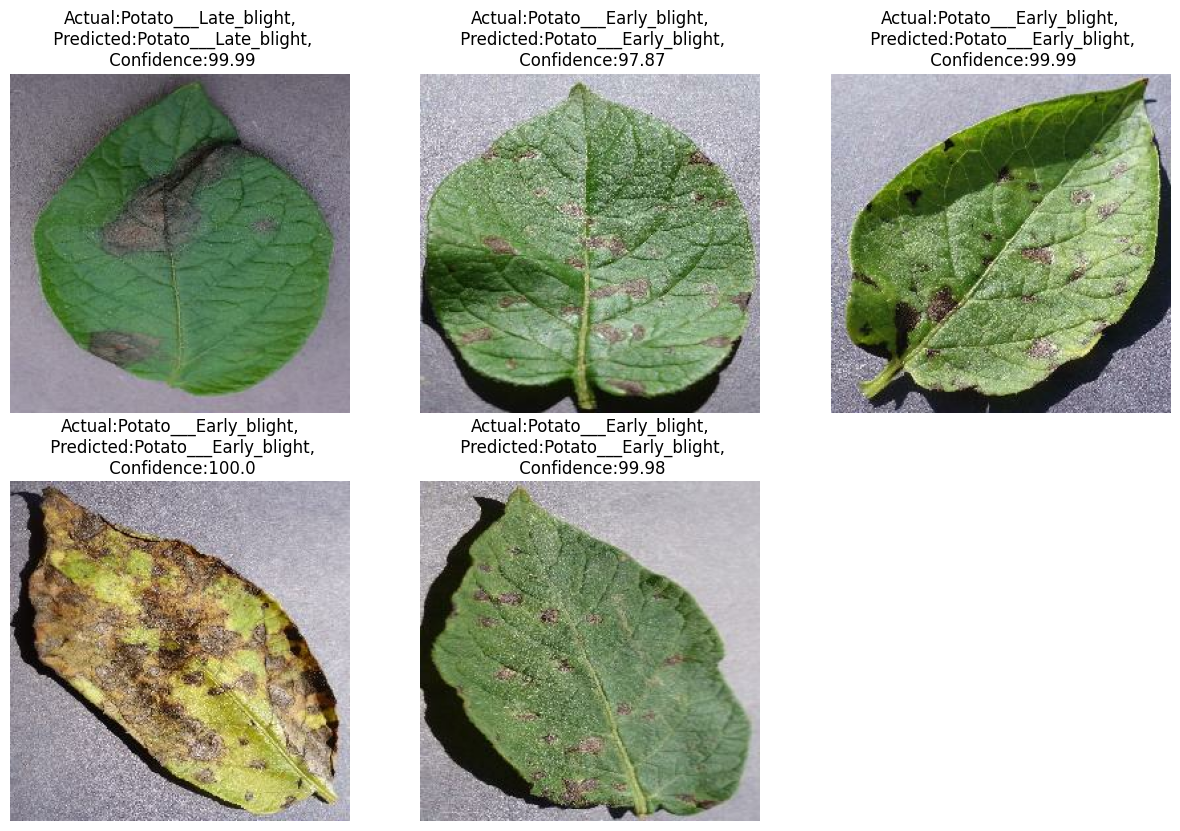

In [94]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(5):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{actual_class},\n Confidence:{confidence}")
        plt.axis("off")

In [1]:
model_version=1
model.save(f"../savedmodel/{model_version}")

NameError: name 'model' is not defined